In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
from sklearn.preprocessing import MinMaxScaler
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import random

# 闭式解
X, y = sd.load_svmlight_file('housing_scale.txt',n_features = 13)
X_train, X_valid, y_train, y_valid = sms.train_test_split(X, y,test_size=0.1,shuffle=True)

X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)#转化为1列

def compute_loss(X, y, theta):
    '''均方误差损失'''
    hx = X.dot(theta)#w点乘X
    error = np.power((hx - y), 2).mean()
    return error

def normal_equation(X, y):
    return (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)


def gradient(X, y, theta):
    '''梯度计算'''
    return X.T.dot(X.dot(theta) - y)

def random_descent(X, y, theta, alpha, iters, X_valid, y_valid):
    '''随机梯度下降'''
    n=X.shape
    loss_train = np.zeros((iters,1))
    loss_valid = np.zeros((iters,1))
    for i in range(iters):
        num=np.random.randint(n,size=1)
        x_select=X[num,:]
        y_select=y[num,0]
        grad = gradient(x_select, y_select, theta)
        theta = theta - alpha * grad
        loss_train[i] = compute_loss(X, y, theta)
        loss_valid[i] = compute_loss(X_valid, y_valid, theta)
        # print("valid loss",loss_valid[i])
    return theta, loss_train, loss_valid


In [2]:
theta = normal_equation(X_train, y_train)

loss_train = compute_loss(X_train, y_train, theta)
loss_valid = compute_loss(X_valid, y_valid, theta)

print(loss_train)
print(loss_valid)

25.176517930032695
17.061578152031746


44.286639787030765
36.7910237652973


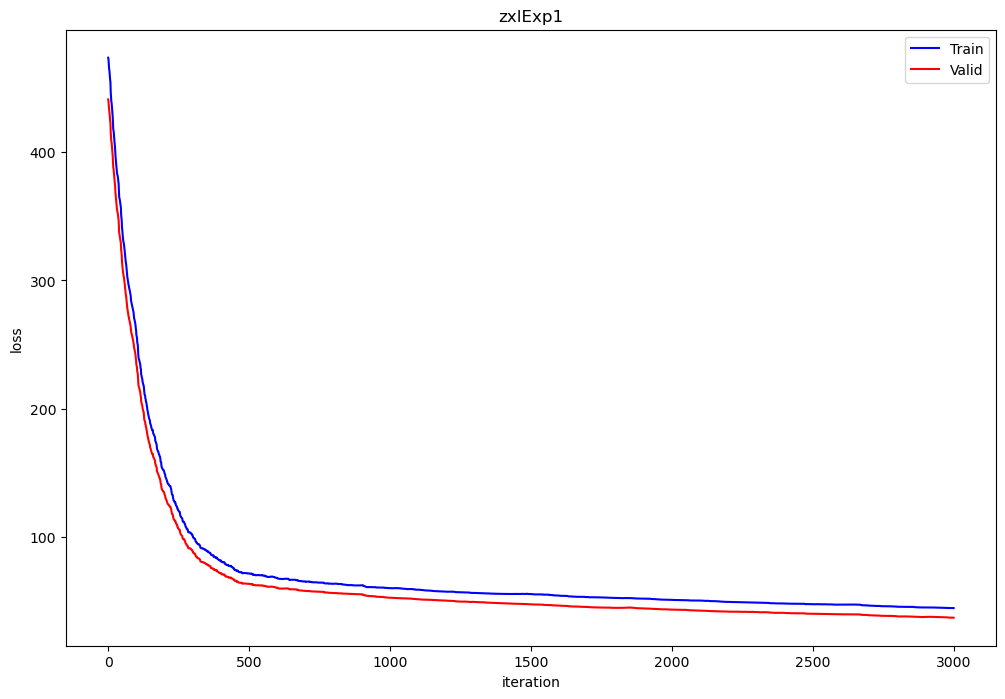

In [7]:
# theta = np.zeros((13, 1))
theta = np.random.normal(size=(13,1),loc=0,scale=1)
# 随机梯度下降
alpha = 0.001
iters = 3000
opt_theta, loss_train, loss_valid = random_descent(X_train, y_train, theta, alpha, iters, X_valid, y_valid)
print(loss_train.min())
print(loss_valid.min())

# 作图
iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('zxlExp1')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Train')
plt.plot(iteration, loss_valid, 'r', label='Valid')
plt.legend()
plt.show()


0.6750937591588007
0.5343611568658129


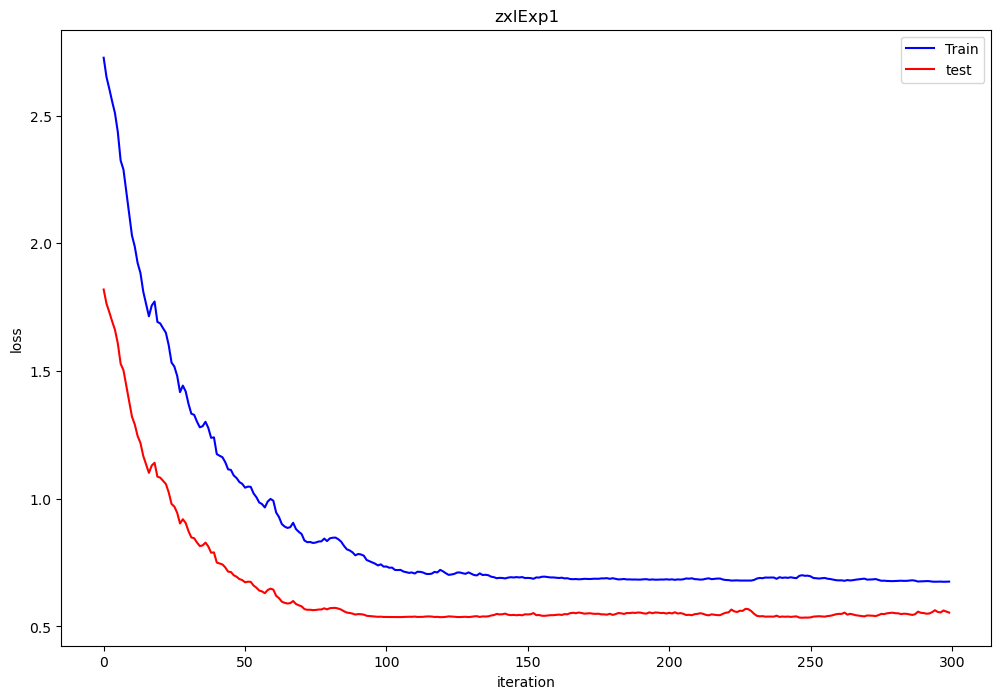

In [12]:
# student grade
studata_train=pd.read_csv('TrainSet.csv').fillna(0)
studata_test=pd.read_csv('TestSet.csv').fillna(0)

# 
scaler=MinMaxScaler()
studata_train = pd.DataFrame(scaler.fit_transform(studata_train), columns=studata_train.columns)
studata_test = pd.DataFrame(scaler.fit_transform(studata_test), columns=studata_test.columns)

X_train=studata_train.drop('Machine learning grade point',axis=1).values
y_train=studata_train['Machine learning grade point'].values
X_test=studata_test.drop('Machine learning grade point',axis=1).values
y_test=studata_test['Machine learning grade point'].values

y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)#转化为1列

theta = np.random.normal(size=(28,1),loc=0,scale=1)
alpha = 0.001
iters = 300
opt_theta, loss_train, loss_test = random_descent(X_train, y_train, theta, alpha, iters, X_test, y_test)
print(loss_train.min())
print(loss_test.min())
# 作图
iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('zxlExp1')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Train')
plt.plot(iteration, loss_test, 'r', label='test')
plt.legend()
plt.show()